<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week10_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (05 | 2141720025)

Diah Putri Nofianti (12 | 2141720054)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week10/image_thres'
ktp = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week09/ktp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Contoh dengan Library

## Global Threshold

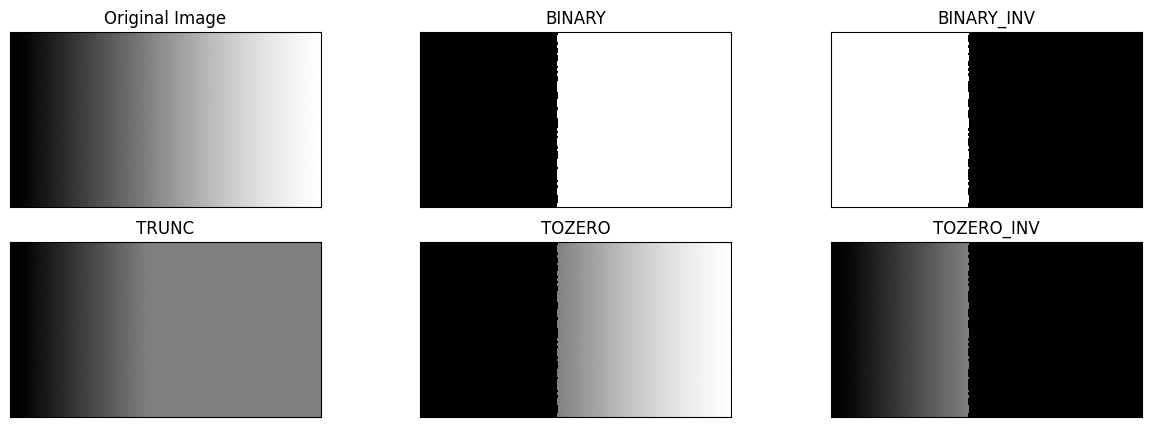

In [ ]:
gradient = cv.imread(f'{path}/gradient.jpg')
thresh = 127 # nilai Threshold yang ditentukan

# 1. thresh1 jika pixel di gradient > 127, maka thresh1 bernilai 1 (putih) selain itu bernilai 0 (hitam)
ret,thresh1 = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY)
# 2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY_INV)
# 3. Threshold Truncate
ret,thresh3 = cv.threshold(gradient,thresh,255,cv.THRESH_TRUNC)
# 4. Threshold Tozero
ret,thresh4 = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO)
# 5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Threshold

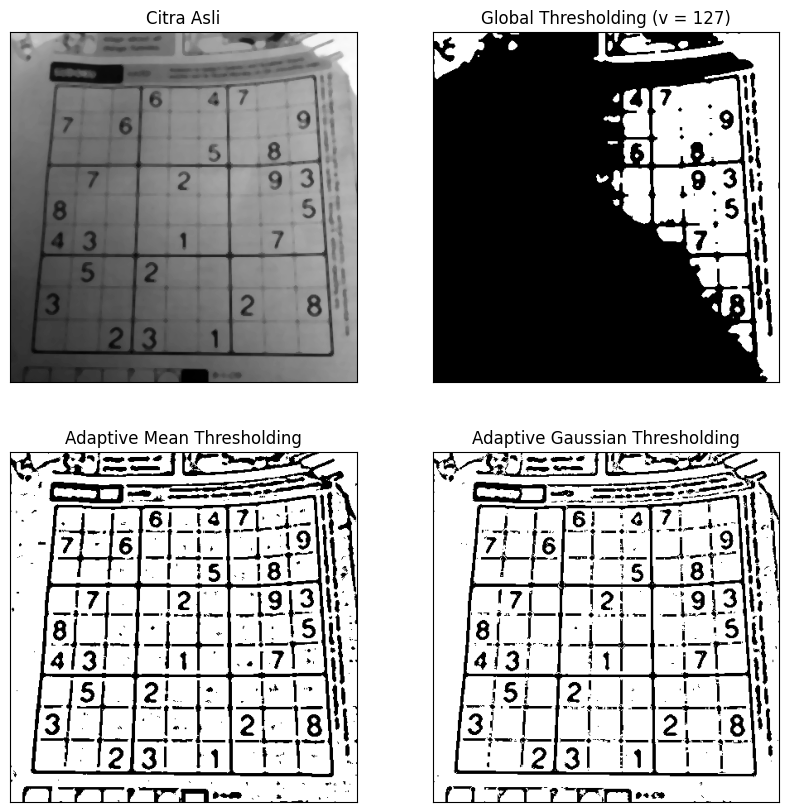

In [ ]:
filename = (f'{path}/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)
thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
  plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## Otsu Threshold

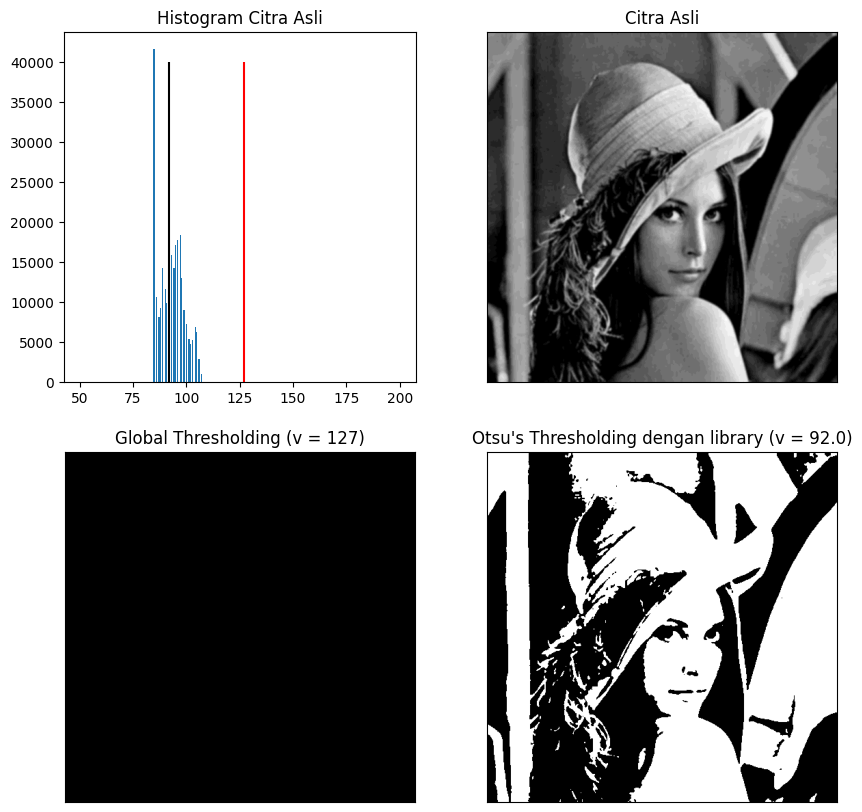

In [ ]:
filename = (f'{path}/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dengan library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') # garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') # garis vertikal hitam menunjukkan threshold 92 hasil otsu
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## Otsu Threshold dengan Gaussian Filter

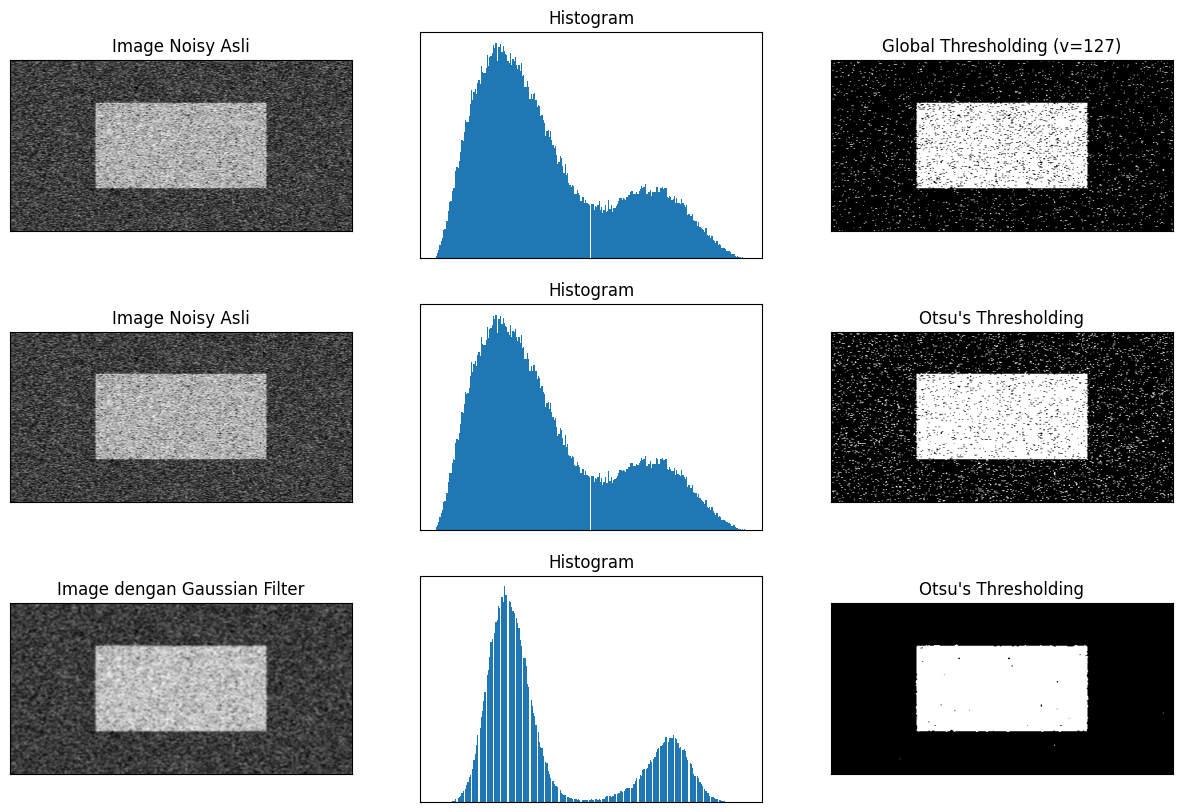

In [ ]:
filename = (f'{path}/noisy2.png')
img = cv.imread(filename,0)

# Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plotting semua image
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)','Image Noisy Asli','Histogram',
          "Otsu's Thresholding",'Image dengan Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Segmentasi Citra dengan K-Means Clustering

In [ ]:
# K-Means Image Segmentation
filename = (f'{path}/jungle.png')
jungle = cv.imread(filename)
jungle = cv.cvtColor(jungle,cv.COLOR_BGR2RGB)

'''
Kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan,
sedangkan image aslinya adalah array 3D selanjutnya kita perlu melakukan flattening array image masukan
'''

# reshape array ke bentuk 2D
pixel_values = jungle.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
Syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon (selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

'''
Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange).
Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini
'''

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid kedalam integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(jungle.shape)

(<Axes: >, <matplotlib.image.AxesImage at 0x793c53800520>)

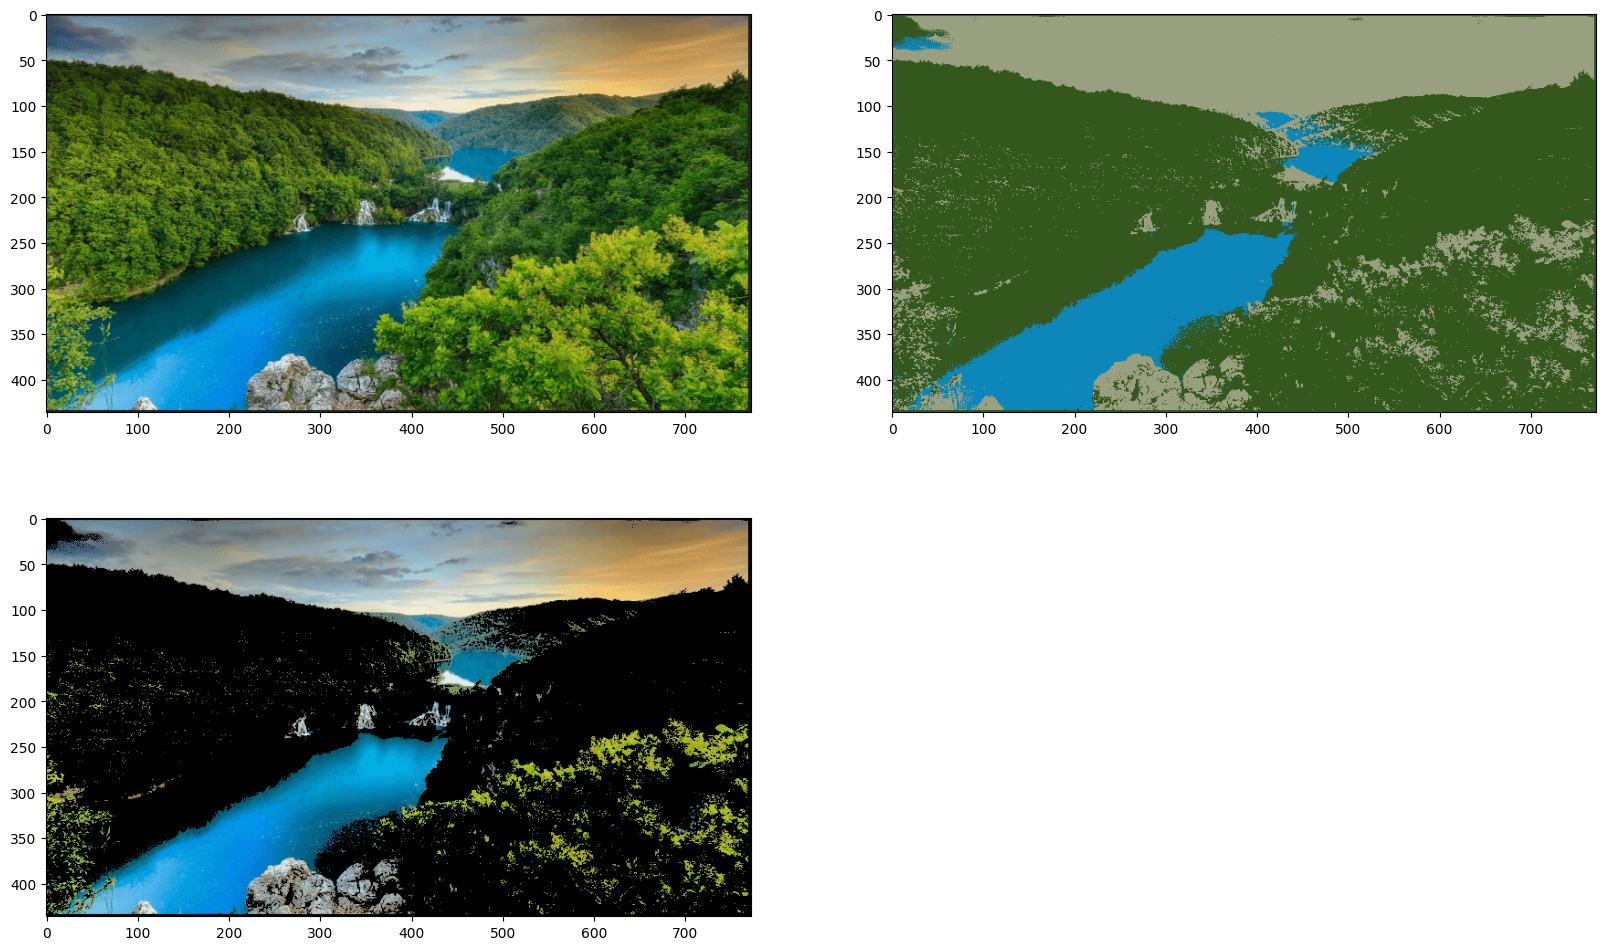

In [ ]:
# ubah pixel di cluster 1 menjadi hitam
masked_image = np.copy(jungle)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-3, 3))
# cluster yang diubah
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(jungle.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(jungle)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

# Praktikum

## Global Threshold (Tanpa Library)

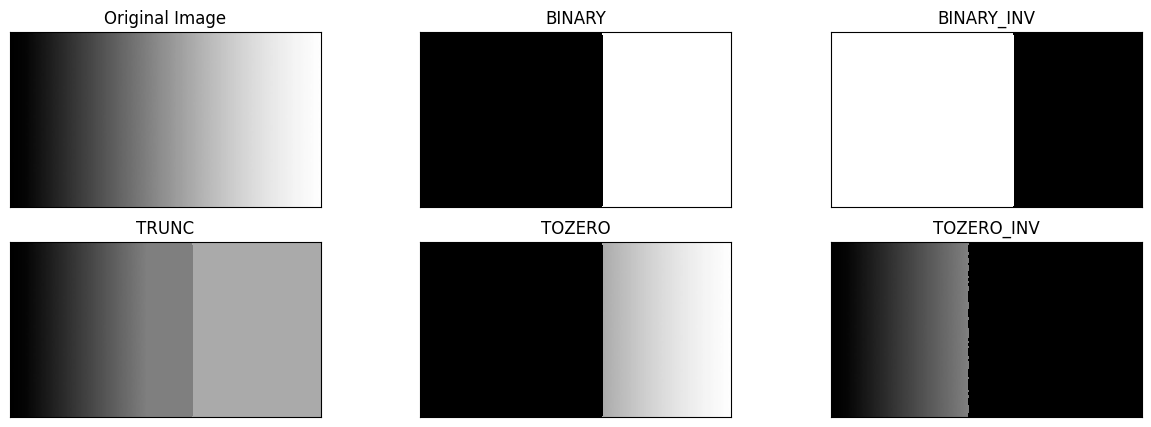

In [ ]:
thresh = 170 # nilai Threshold yang ditentukan

# 1. Binary
thresh1[gradient > thresh] = 255
thresh1[gradient <= thresh] = 0
# 2. Binary Threshold Inverse
thresh2 = 255 - thresh1
# 3. Threshold Truncate
thresh3[gradient > thresh] = thresh
# 4. Threshold Tozero
thresh4[gradient <= thresh] = 0
# 5. Threshold Tozero Inverse
thresh5[gradient > thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## Otsu Thresholding (Tanpa Library)

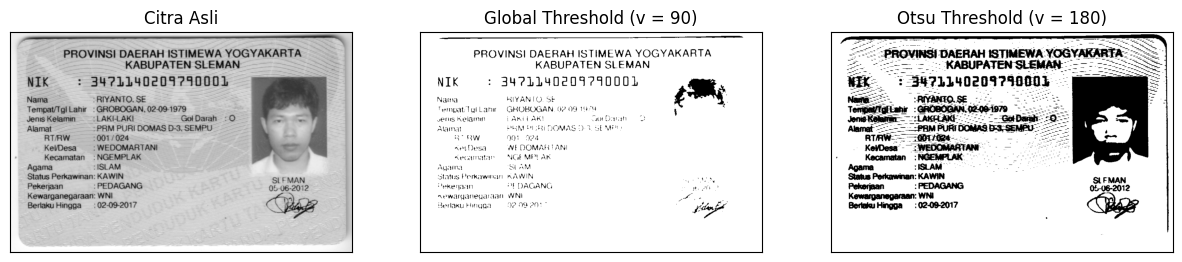

In [ ]:
ktp_img = cv.imread(f'{ktp}/ktp.png', 0)

# Lakukan Gaussian Blur
ksize = (5, 5)
sigmaX = 0
blur = cv.GaussianBlur(ktp_img, ksize, sigmaX)

# Hitung threshold global
global_threshold = 90
_, th1 = cv.threshold(blur, global_threshold, 255, cv.THRESH_BINARY)

# Hitung threshold Otsu secara manual
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist /= hist.sum()
variance = np.zeros((256, 1))

for t in range(256):
    q1 = np.sum(hist[:t])
    q2 = np.sum(hist[t:])
    if q1 == 0 or q2 == 0:
        continue
    m1 = np.sum(np.arange(t) * hist[:t]) / q1
    m2 = np.sum(np.arange(t, 256) * hist[t:]) / q2
    variance[t] = q1 * q2 * (m1 - m2) ** 2

ret2 = np.argmin(np.abs(variance - (150 ** 2)))

_, th2 = cv.threshold(blur, ret2, 255, cv.THRESH_BINARY)

x = "Otsu Threshold (v = " + str(ret2) + ")"
titles = ['Citra Asli', 'Global Threshold (v = 90)', x]
citra3 = [blur, th1, th2]

# Tampilkan citra
plt.figure(figsize=(15, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## Histogram Segmentasi Citra

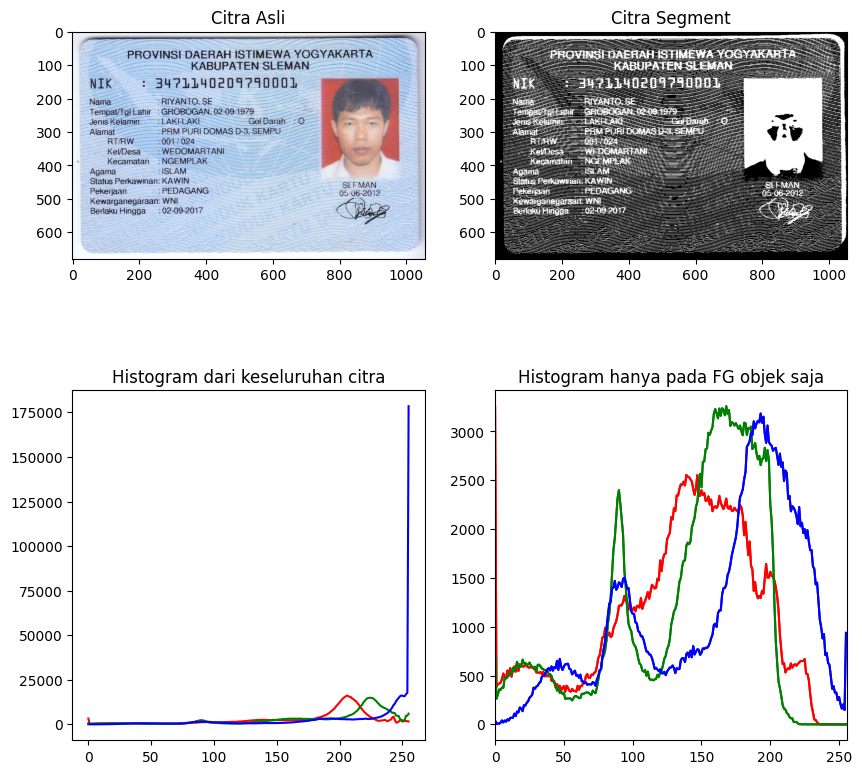

In [ ]:
img = cv.imread(f'{ktp}/ktp.png')
citra = cv.cvtColor(img,cv.COLOR_BGR2RGB)

ret3,mask = cv.threshold(ktp_img,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1), plt.imshow(citra), plt.title('Citra Asli')
plt.subplot(2,2,2), plt.imshow(mask, 'gray'), plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv.calcHist([citra],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([citra],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([citra],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

## Segmentasi Warna

(<Axes: >, <matplotlib.image.AxesImage at 0x793c52f55c60>)

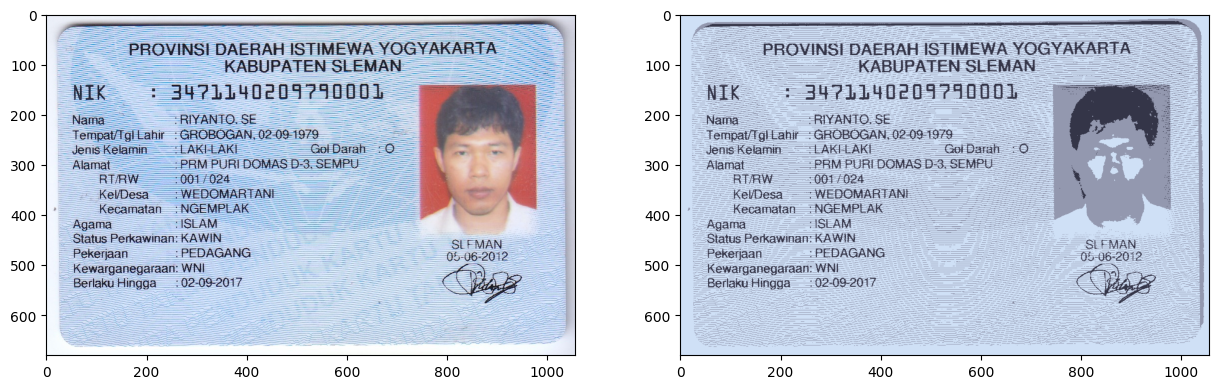

In [ ]:
# reshape array ke bentuk 2D
pixel_values = citra.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid kedalam integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(citra.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(citra)
plt.subplot(2,2,2),plt.imshow(segmented_image)

# Tugas
Implementasikan thresholding dengan beberapa metode yang
telah diketahui untuk melakukan segmentasi pada dataset KTP.

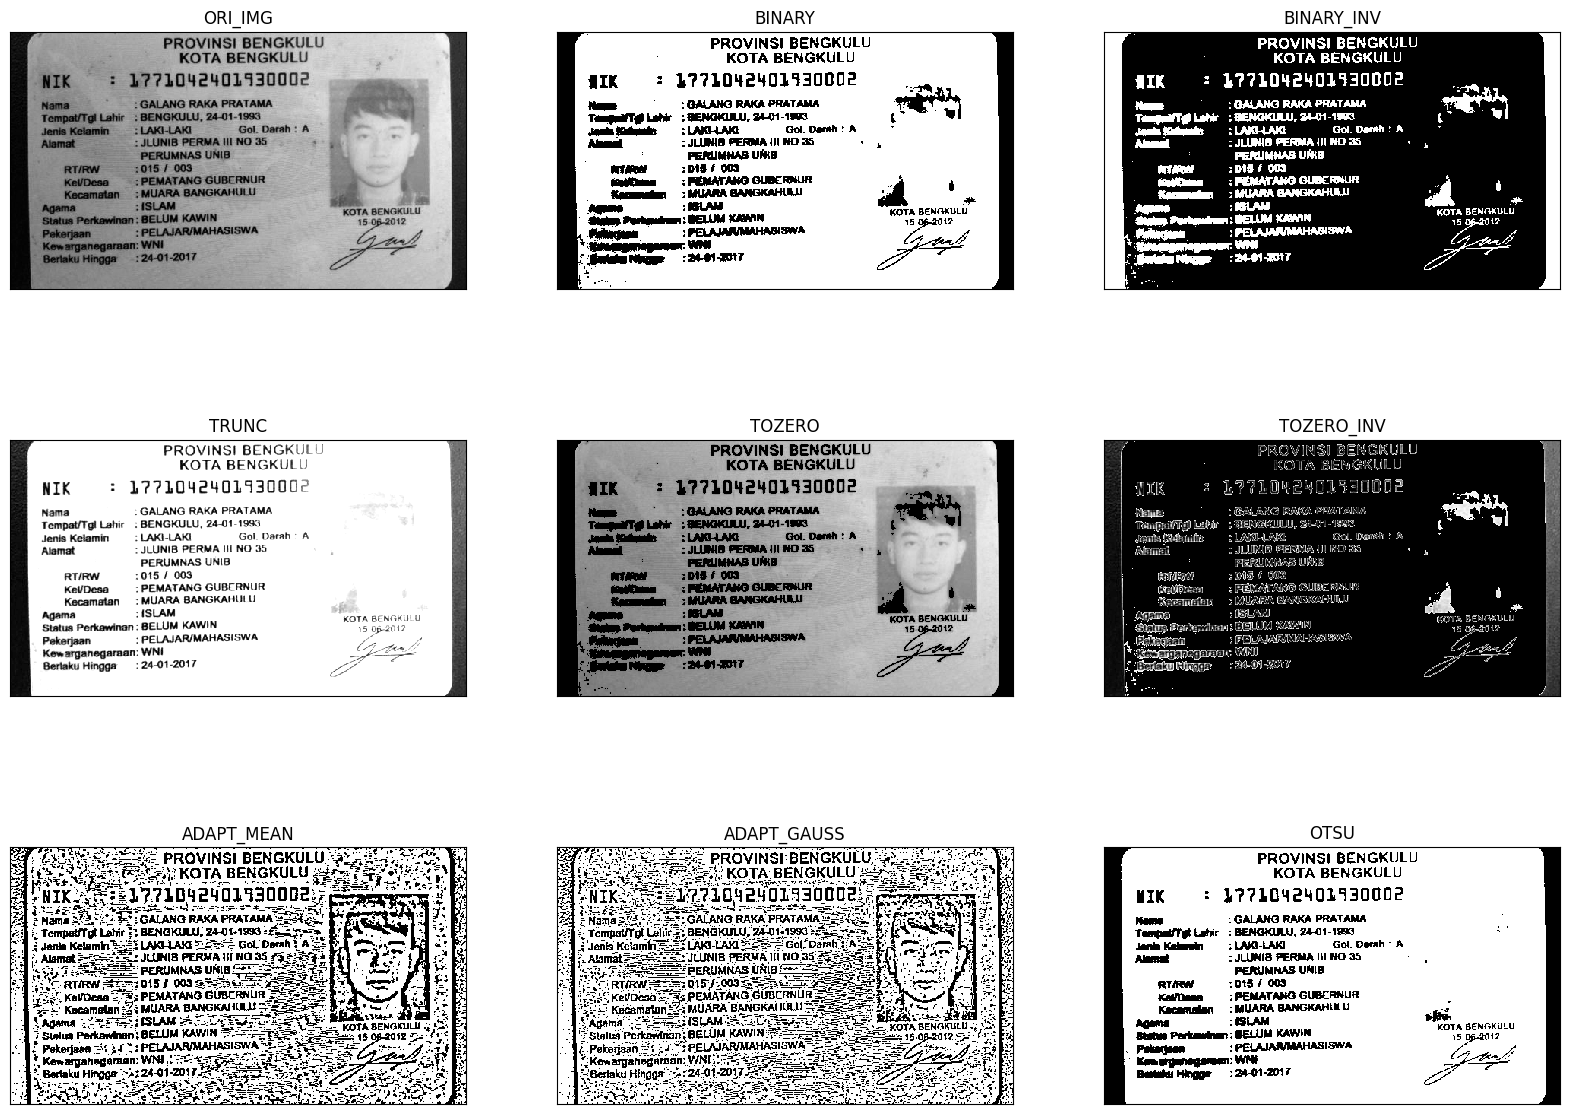

In [ ]:
ktp_img = cv.imread(f'{ktp}/ktp1.png', 0)

thresh = 100 # nilai Threshold yang ditentukan

# 1. Global Threshold
ret,thresh1 = cv.threshold(ktp_img,thresh,255,cv.THRESH_BINARY)
# 2. Binary Inverse Threshold
ret,thresh2 = cv.threshold(ktp_img,thresh,255,cv.THRESH_BINARY_INV)
# 3. Truncate Threshold
ret,thresh3 = cv.threshold(ktp_img,thresh,255,cv.THRESH_TRUNC)
# 4. Tozero Threshold
ret,thresh4 = cv.threshold(ktp_img,thresh,255,cv.THRESH_TOZERO)
# 5. Tozero Inverse Threshold
ret,thresh5 = cv.threshold(ktp_img,thresh,255,cv.THRESH_TOZERO_INV)
# 6. Adaptive Mean Thresholding
thresh6 = cv.adaptiveThreshold(ktp_img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
# 7. Adaptive Gaussian Thresholding
thresh7 = cv.adaptiveThreshold(ktp_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
# 8. Otsu Thresholding
ret2,thresh8 = cv.threshold(ktp_img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

titles = ['ORI_IMG','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','ADAPT_MEAN','ADAPT_GAUSS','OTSU']
images = [ktp_img, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6, thresh7, thresh8]
plt.figure(figsize = (20,15))
for i in range(len(images)):
  plt.subplot(3,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()